# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">Group 30 - Project</h3>**

**Group members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Gonçalo Peres - 20211625@novaims.unl.pt - 20211625<br>
Leonor Mira - 20240658@novaims.unl.pt - 20240658<br>
Miguel Natário - 20240498@novaims.unl.pt - 20240498<br>
Nuno Bernardino  - 2021546@novaims.unl.pt - 2021546<br>

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Import the Datasets](#chapter2)
* [3. Explore the Dataset ](#chapter3)
    * [Basic Statistics](#section_3_1)  #this need to be changed
    * [Inconsistencies](#section_3_2) 
    * [Visualization](#section_3_3)  
* [4. Preprocessing the Data](#chapter4)
    * [Missing Values](#section_4_1)  
    * [Outliers](#section_4_2) #boxplots for ex
    * [Categorical](#section_4_3)  #encoding por ex
* [5. Feature Engineering](#chapter5)
* [6. Feature Selection](#chapter6)
    * [Scaling the Data](#section_6_1)  
    * [Numerical Features](#section_6_2) 
    * [Categorical Features](#section_6_3) 
    * [Final Features](#section_6_3)
* [7. Modeling](#chapter7) 

# 1. Import the Libraries<a class="anchor" id="chapter1"></a>

In [89]:
#importing standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# 2. Import the Datasets <a class="anchor" id="chapter2"></a>
Before importing the datasets, we need to unzip the data file.

In [90]:
zip_path = r'../Data.zip'  # Adjust based on actual location
extract_to_path = '../project_data'

# Extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete.")

Extraction complete.


In [91]:
# setar Claim Identifier como index

In [92]:
df_train = pd.read_csv('../project_data/Data/train_data.csv')
df_test = pd.read_csv('../project_data/Data/test_data.csv')

In [93]:
df_train.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0


In [94]:
df_test.head(2).T


,0,1
Accident Date,2022-12-24,2022-11-20
Age at Injury,19,19
Alternative Dispute Resolution,N,N
Assembly Date,2023-01-02,2023-01-02
Attorney/Representative,N,N
Average Weekly Wage,NaN,NaN
Birth Year,2003.0,2003.0
C-2 Date,2023-01-02,2023-01-02
C-3 Date,NaN,NaN
Carrier Name,INDEMNITY INSURANCE CO OF,A I U INSURANCE COMPANY


## 3. Explore the Dataset <a class="anchor" id="chapter3"></a>
In this chapter we will perform the basic steps to get to know our dataset.

## 3.1. Basic Statistics <a class="anchor" id="section_3_1"></a>

The <span style='color:Blue'> info()  </span> method prints information about the dataframe.

In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

**Some conclusions from the output above**: some datatypes need to be changed and we have some missing values (this will be treated in 4.1.Missing values) 

In [96]:
#Converting Date Columns
# Convert object columns to datetime format
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
df_train[date_columns] = df_train[date_columns].apply(pd.to_datetime, errors='coerce')

In [97]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Accident Date                       570337 non-null  datetime64[ns]
 1   Age at Injury                       574026 non-null  float64       
 2   Alternative Dispute Resolution      574026 non-null  object        
 3   Assembly Date                       593471 non-null  datetime64[ns]
 4   Attorney/Representative             574026 non-null  object        
 5   Average Weekly Wage                 545375 non-null  float64       
 6   Birth Year                          544948 non-null  float64       
 7   C-2 Date                            559466 non-null  datetime64[ns]
 8   C-3 Date                            187245 non-null  datetime64[ns]
 9   Carrier Name                        574026 non-null  object        
 10  Carrier 

In [98]:
# Convert object columns to category
categorical_columns = ['Alternative Dispute Resolution', 'Carrier Name', 'Carrier Type', 
                       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
                       'District Name', 'Gender', 'WCB Decision', 'Medical Fee Region']

df_train[categorical_columns] = df_train[categorical_columns].astype('category')

In [99]:
# Example: Convert numerical columns stored as objects to float (if necessary)
df_train['Average Weekly Wage'] = pd.to_numeric(df_train['Average Weekly Wage'], errors='coerce')

# birth year -->

The <span style='color:Blue'> describe()  </span> method  is used for calculating some statistical data.

In [100]:
df_train.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,570337,2021-04-28 21:00:27.892982784,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2023-09-29 00:00:00,NaN
Age at Injury,574026.0,42.11427,0.0,31.0,42.0,54.0,117.0,14.256432
Assembly Date,593471,2021-07-19 03:25:38.260841728,2020-01-01 00:00:00,2020-10-26 00:00:00,2021-07-29 00:00:00,2022-04-19 00:00:00,2022-12-31 00:00:00,NaN
Average Weekly Wage,545375.0,491.088321,0.0,0.0,0.0,841.0,2828079.0,6092.91812
Birth Year,544948.0,1886.767604,0.0,1965.0,1977.0,1989.0,2018.0,414.644423
C-2 Date,559466,2021-07-16 20:11:19.865443328,1996-01-12 00:00:00,2020-11-06 00:00:00,2021-08-09 00:00:00,2022-04-26 00:00:00,2024-06-01 00:00:00,NaN
C-3 Date,187245,2021-07-26 21:31:28.449891840,1992-11-13 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00,NaN
Claim Identifier,593471.0,23667598.792812,5393066.0,5593414.5,5791212.0,5991000.5,999891667.0,107927137.907028
First Hearing Date,150798,2022-03-19 05:07:38.218278400,2020-01-30 00:00:00,2021-06-01 00:00:00,2022-03-09 00:00:00,2023-01-11 00:00:00,2024-06-07 00:00:00,NaN
IME-4 Count,132803.0,3.207337,1.0,1.0,2.0,4.0,73.0,2.832303


In [101]:
df_train.describe(include=['O']).T

,count,unique,top,freq
Attorney/Representative,574026,2,N,392291
Industry Code Description,564068,20,HEALTH CARE AND SOCIAL ASSISTANCE,114339
WCIO Cause of Injury Description,558386,74,LIFTING,46610
WCIO Nature of Injury Description,558369,56,STRAIN OR TEAR,153373
WCIO Part Of Body Description,556944,54,LOWER BACK AREA,51862
Zip Code,545389,10060,11236,3302


The <span style='color:Blue'> var()  </span> method allows us to check if there are any of the numerical variables are univariate (variance is equal to 0). 

In [102]:
# Selecionar apenas as colunas numéricas
numerical_cols = df_train.select_dtypes(include=['number'])

# Calcular a variância apenas nas colunas numéricas
numerical_cols.var()

Age at Injury                         2.032459e+02
Average Weekly Wage                   3.712365e+07
Birth Year                            1.719300e+05
Claim Identifier                      1.164827e+16
IME-4 Count                           8.021942e+00
Industry Code                         3.858936e+02
OIICS Nature of Injury Description             NaN
WCIO Cause of Injury Code             6.694784e+02
WCIO Nature of Injury Code            4.931740e+02
WCIO Part Of Body Code                5.002353e+02
Agreement Reached                     4.448758e-02
Number of Dependents                  4.003206e+00
dtype: float64

## 3.2. Inconsistencies <a class="anchor" id="section_3_2"></a>
Idk if i like the inconsistencies here, maybe should be in the 4. pre processing the dataset, but idk

In [103]:
df= df_train.copy()

### 3.2.1. Age at Injury: Identify any entries where Age is 0 or greater than 100 (possible outliers)

In [104]:
# Identify any entries where Age is 0 or greater than 100 (possible outliers)
age_outliers = df[(df['Age at Injury'] == 0) | (df['Age at Injury'] > 100)]
print(f"Number of age outliers: {age_outliers.shape[0]}")

Number of age outliers: 5518


We decided to delete.

In [105]:
# Drop age outliers from the dataset
df = df.drop(age_outliers.index)

### 3.2.2.  Handling Average Weekly Wage Inconsistencies

In [106]:
# 1.2 Average Weekly Wage: Check for negative or extremely high wages
wage_neg = df[df['Average Weekly Wage'] < 0]

print(f"Number of negative wages: {wage_neg.shape[0]}")

Number of negative wages: 0


In [107]:
wage_null = df[df['Average Weekly Wage'] == 0]

print(f"Number of zero wages: {wage_null.shape[0]}")

Number of zero wages: 330545


It is not logical for the Average Weekly Wage to be zero, given that the dataset relates to job insurances. We will therefore assume that these entries represent missing values, especially since they constitute more than 50% of the dataset.

In [108]:
# Replace zero wages with NaN
df['Average Weekly Wage'].replace(0, pd.NA, inplace=True)

### 3.2.3. Handling Birth Year Inconsistencies
The Birth Year should be realistic, meaning it should not be before 1900 or too far into the future. Additionally, entries with a birth year of 0 will be considered missing values, as a person must have a birth year.

In [109]:
# Replace 0 Birth Year with NaN
df['Birth Year'].replace(0, pd.NA, inplace=True)

# Identify unrealistic Birth Year entries (e.g., before 1940 or after 2006)
birth_year= df[(df['Birth Year'] < 1940) | (df['Birth Year'] > 2006)]
print(f"Number of unrealistic birth years: {birth_year.shape[0]}")

Number of unrealistic birth years: 730


In [110]:
# Drop birth year outliers from the dataset
df = df.drop(birth_year.index)

### 3.2.4. Age at Injury vs. Birth Year
We need to ensure that the Age at Injury is consistent with the Birth Year and the Accident Date. We'll use the Accident Date to verify consistency where possible.

In [111]:
# Extract Accident Year from Accident Date
df['Accident Year'] = pd.to_datetime(df['Accident Date'], errors='coerce').dt.year

# Identify discrepancies between calculated age and given Age at Injury
age_discrepancies = df[(df['Birth Year'].notnull()) & (df['Accident Year'].notnull()) & 
                       ((df['Accident Year'] - df['Birth Year']) != df['Age at Injury'])]
print(f"Number of age discrepancies: {age_discrepancies.shape[0]}")

Number of age discrepancies: 242960


In [112]:
# Drop entries with age discrepancies
df = df.drop(age_discrepancies.index)

### 3.2.5. First Hearing Date vs. Accident Date

In [113]:
# Identify entries where First Hearing Date is earlier than Accident Date
invalid_hearing_dates = df[(df['First Hearing Date'].notnull()) & (df['Accident Date'].notnull()) & 
                           (df['First Hearing Date'] < df['Accident Date'])]
print(f"Number of invalid hearing dates: {invalid_hearing_dates.shape[0]}")

Number of invalid hearing dates: 46


In [114]:
# Drop entries with invalid hearing dates
df = df.drop(invalid_hearing_dates.index)

### 3.2.6. C2 Date vs. C3 Date vs Accident Date
The C2 Date must be before the C3 Date, and it must also be after the Accident Date.

In [115]:
# C2 must be before C3
df_invalid_c2_c3 = df[(df['C-2 Date'].notnull()) & (df['C-3 Date'].notnull()) & 
                     (df['C-2 Date'] > df['C-3 Date'])]
print(f"Number of invalid C2 vs. C3 dates: {df_invalid_c2_c3.shape[0]}")


Number of invalid C2 vs. C3 dates: 41687


In [116]:
# # Drop invalid entries
# df = df.drop(df_invalid_c2_c3.index)

In [117]:
# C2 must be after Accident Date
df_invalid_c2_accident = df[(df['C-2 Date'].notnull()) & (df['Accident Date'].notnull()) & 
                            (df['C-2 Date'] < df['Accident Date'])]
print(f"Number of invalid C2 vs. Accident dates: {df_invalid_c2_accident.shape[0]}")

Number of invalid C2 vs. Accident dates: 529


In [118]:
# # Drop invalid entries
# df = df.drop(df_invalid_c2_accident.index)

### 3.2.7. Assembly Date vs. Accident Date

In [119]:
# Identify entries where Assembly Date is after Accident Date
invalid_assembly_dates = df[(df['Assembly Date'].notnull()) & (df['Accident Date'].notnull()) & 
                            (df['Assembly Date'] > df['Accident Date'])]
print(f"Number of invalid assembly dates: {invalid_assembly_dates.shape[0]}")


Number of invalid assembly dates: 322010


### 3.2.8. Handling ZIP Code Format
The ZIP Code must have 5 digits. If the length is 4, add a leading zero.

In [120]:
# Ensure ZIP Code is in string format
df['Zip Code'] = df['Zip Code'].astype(str)

# Add leading zero to ZIP Codes with length 4
df['Zip Code'] = df['Zip Code'].apply(lambda x: x.zfill(5) if len(x) == 4 else x)

### 3.2.9. Handling Target Variable Missing Values

In [121]:
# Drop rows where the target variable is NaN
df = df.dropna(subset=['Claim Injury Type'])

In [122]:
# # Drop invalid entries
# df = df.drop(invalid_assembly_dates.index)

In [123]:
# c2 tem de ser antes do c3

# c2 tem de ser dps do accident date

#assembly date tem de ser menor que accidentd date 


# combinações entre combination e code

# zip code tem de ter 5 digitos - ter atenção que pode haver 07888 --> se tiver length the 4 é adiconar 0 no fim 

# NUMBER OF DEPEDENTS TEM DE TER OBJECT 

# target nao pode ser nan -

In [124]:
df_train['Medical Fee Region'].value_counts()

Medical Fee Region
IV     265981
I      135885
II      85033
III     53654
UK      33473
Name: count, dtype: int64

In [125]:
df_train['Medical Fee Region'].isnull().sum()

19445

In [126]:
df_train['Gender'].value_counts() 

Gender
M    335218
F    234051
U      4711
X        46
Name: count, dtype: int64

In [127]:
df_train['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64

In [128]:
df_train['Alternative Dispute Resolution'].isnull().sum()

19445

In [129]:
# passar X eliminamos 
# U existe

## 3.3. Visualization <a class="anchor" id="section_3_3"></a>
Here i think that we should separate the numerical:
- continuous
- discrete 
- categorical 
- text features

In [130]:
# Define metric and non-metric features
metric_features = df_train.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df_train.select_dtypes(exclude=['number']).columns.tolist()


# Output the results
print(f"Non-metric features: {non_metric_features}")
print(f"Metric features: {metric_features}")

Non-metric features: ['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision']
Metric features: ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Claim Identifier', 'IME-4 Count', 'Industry Code', 'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents']


In [131]:
import math

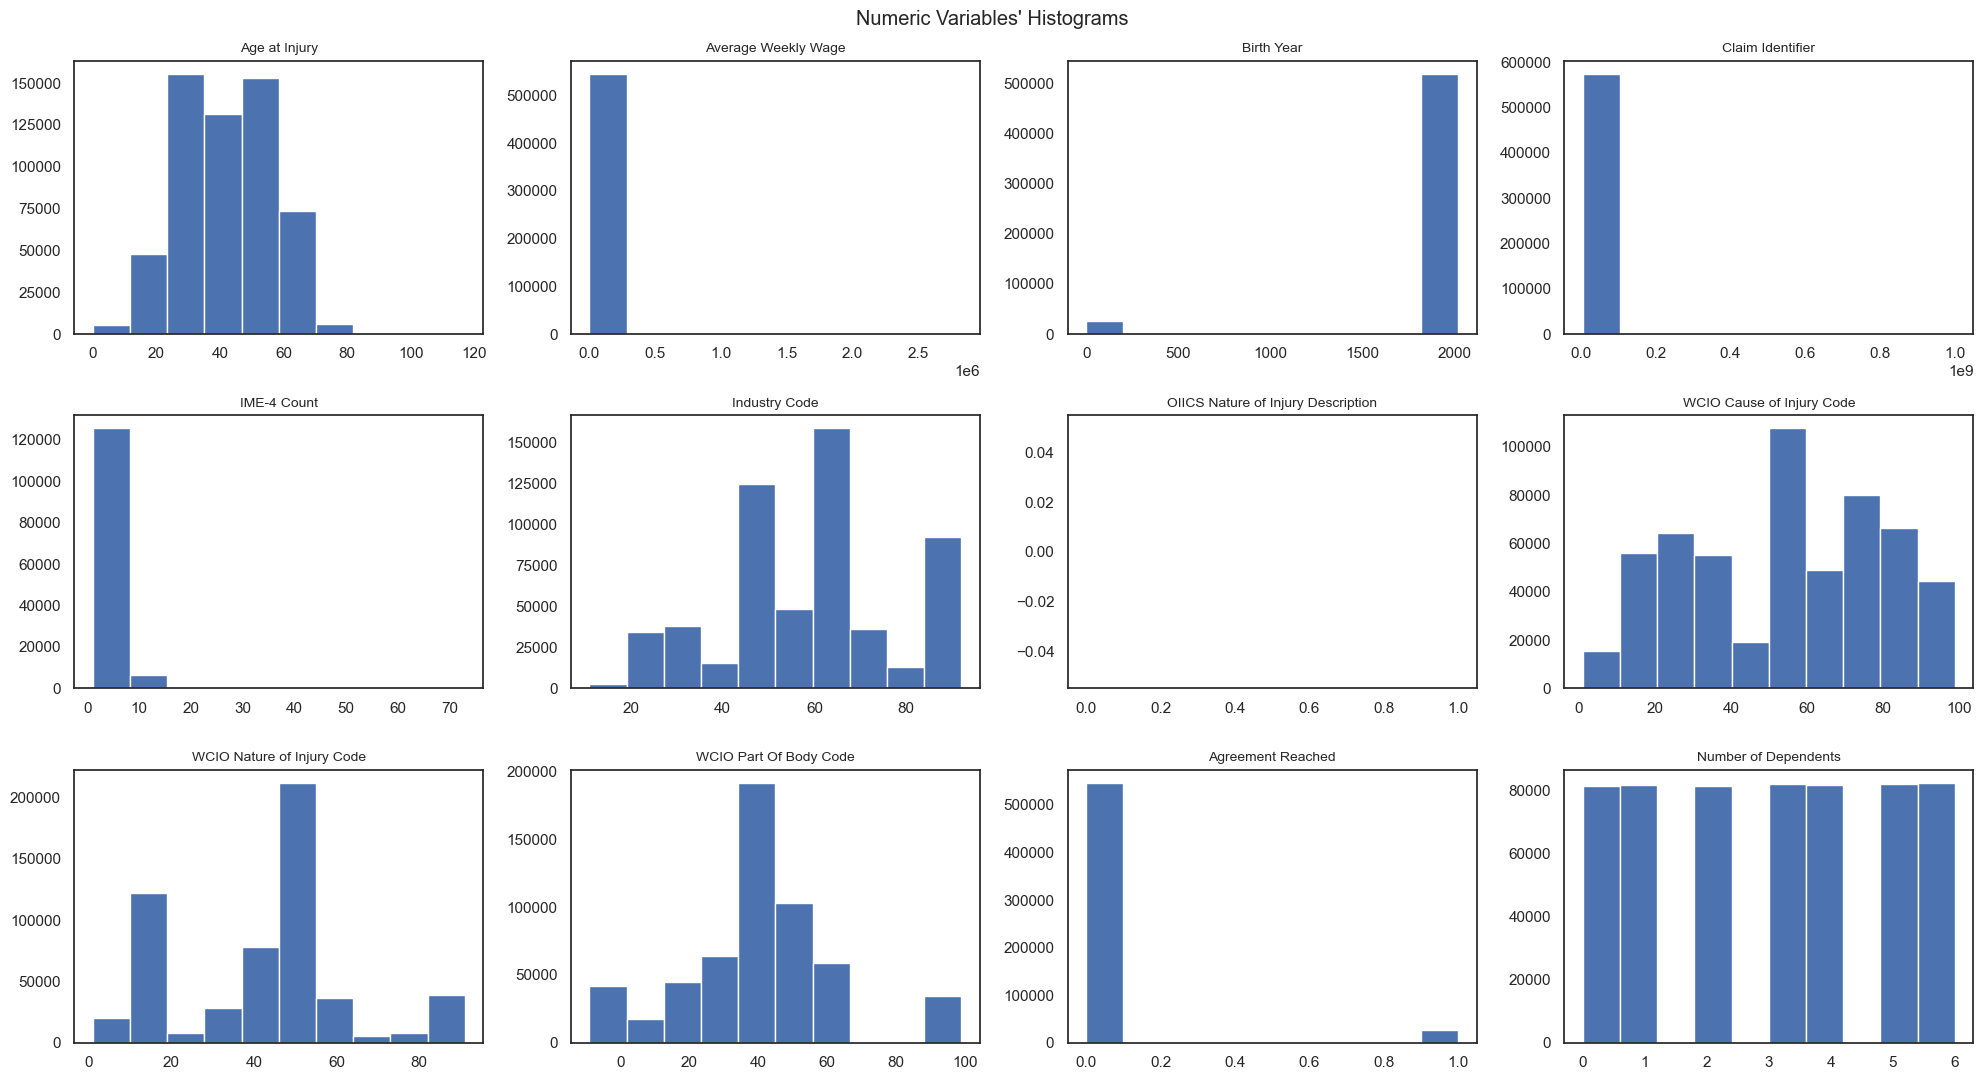

In [132]:
# Plot ALL Numeric Variables' Histograms in one figure
#this ignores the nan values

sns.set_theme(style='white')

# Calculate the number of rows and columns for a square matrix layout
total_features = len(metric_features)
sp_cols = math.ceil(math.sqrt(total_features))  # Columns based on the square root of total features
sp_rows = math.ceil(total_features / sp_cols)   # Rows to accommodate all features

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
# Plot data, ignoring NaN values for each feature
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df_train[feat].dropna())  # Use dropna() to exclude NaNs
    ax.set_title(feat, fontsize=10)  # Title with a clean size

# Remove empty subplots if there are more axes than features
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)

# Layout
title = "Numeric Variables' Histograms"
plt.suptitle(title)

# Save the figure
# plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()

sns.set() ## Reset to darkgrid 

## 4. Preprocessing the Dataset <a class="anchor" id="chapter4"></a>
In this chapter we will perform the basic steps to get to know our dataset.

## 4.1. Missing Values <a class="anchor" id="section_4_1"></a>


In [133]:
print(df_train.isnull().sum())

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

In [134]:
# Set the threshold for missing values (e.g., more than 40% missing)
threshold = 0.4

# Calculate the percentage of missing values for each column
missing_percentage = df_train.isnull().mean()

# Filter columns that have more than the threshold of missing values
high_missing_columns = missing_percentage[missing_percentage > threshold]

# Display the columns with their missing percentage
print(high_missing_columns)

C-3 Date                              0.684492
First Hearing Date                    0.745905
IME-4 Count                           0.776227
OIICS Nature of Injury Description    1.000000
dtype: float64


In [135]:
#As First Hearing Date presents missing values (which form is represented by NaN) but have meaning we decide not to remove it from the dataset.

In [136]:
#As IME-4 represents the number of independent medical audicts examination we decided to convert nan to 0 meaning that there wasn't any
df_train['IME-4 Count'].unique()

array([nan,  4.,  1.,  3.,  2.,  6.,  7.,  5., 10., 12.,  8.,  9., 11.,
       13., 14., 36., 15., 20., 19., 18., 27., 17., 16., 24., 22., 26.,
       21., 23., 30., 32., 39., 25., 29., 47., 48., 34., 28., 37., 31.,
       35., 33., 73.])

In [137]:
df_train['IME-4 Count'].fillna(0, inplace=True)
df_train['IME-4 Count'].unique()

array([ 0.,  4.,  1.,  3.,  2.,  6.,  7.,  5., 10., 12.,  8.,  9., 11.,
       13., 14., 36., 15., 20., 19., 18., 27., 17., 16., 24., 22., 26.,
       21., 23., 30., 32., 39., 25., 29., 47., 48., 34., 28., 37., 31.,
       35., 33., 73.])

In [138]:
#We decided to drop OIICS Nature of Injury Description and C-3 Date based on the threshold that we pre defined meaning those features don't have enough predictive power based on the amount of missing information.
df_train = df_train.drop(['OIICS Nature of Injury Description','C-3 Date'], axis=1)
#tinhas escrito apenas, df. alterei para df tran. verificar.

**WE still have missing values --> for now i will just delete them but we need to think about them**

In [139]:
missing_percentage = df_train.isnull().mean() * 100
missing_percentage

Accident Date                         3.898084
Age at Injury                         3.276487
Alternative Dispute Resolution        3.276487
Assembly Date                         0.000000
Attorney/Representative               3.276487
Average Weekly Wage                   8.104187
Birth Year                            8.176137
C-2 Date                              5.729850
Carrier Name                          3.276487
Carrier Type                          3.276487
Claim Identifier                      0.000000
Claim Injury Type                     3.276487
County of Injury                      3.276487
COVID-19 Indicator                    3.276487
District Name                         3.276487
First Hearing Date                   74.590502
Gender                                3.276487
IME-4 Count                           0.000000
Industry Code                         4.954412
Industry Code Description             4.954412
Medical Fee Region                    3.276487
WCIO Cause of

In [140]:
#As Claim Injury Type is our primary target variable we decide to remove every row which is 0 or na
df_train = df_train[(df_train['Claim Injury Type'] != 0) & (df_train['Claim Injury Type'].notna())]

In [141]:
missing_percentage = df_train.isnull().mean() * 100
missing_percentage

Accident Date                         0.642654
Age at Injury                         0.000000
Alternative Dispute Resolution        0.000000
Assembly Date                         0.000000
Attorney/Representative               0.000000
Average Weekly Wage                   4.991237
Birth Year                            5.065624
C-2 Date                              2.536470
Carrier Name                          0.000000
Carrier Type                          0.000000
Claim Identifier                      0.000000
Claim Injury Type                     0.000000
County of Injury                      0.000000
COVID-19 Indicator                    0.000000
District Name                         0.000000
First Hearing Date                   73.729761
Gender                                0.000000
IME-4 Count                           0.000000
Industry Code                         1.734765
Industry Code Description             1.734765
Medical Fee Region                    0.000000
WCIO Cause of

In [142]:
df_train['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [143]:
#We decided to remove from our dataset all WCIO descriptions (Acho que deviamos voltar a pensar nisto porque podiamos dar encode e ver senão tem algum tipo de poder preditivo)
df_train = df_train.drop(['WCIO Cause of Injury Description','WCIO Nature of Injury Description', 'WCIO Part Of Body Description','Industry Code Description'], axis=1)

In [144]:
missing_percentage = df_train.isnull().mean() * 100
missing_percentage

Accident Date                      0.642654
Age at Injury                      0.000000
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                4.991237
Birth Year                         5.065624
C-2 Date                           2.536470
Carrier Name                       0.000000
Carrier Type                       0.000000
Claim Identifier                   0.000000
Claim Injury Type                  0.000000
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                73.729761
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      1.734765
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          2.724615
WCIO Nature of Injury Code         2.727577
WCIO Part Of Body Code          

In [145]:
# se metade das observaões forem Nan, eliminamos a row 
#Xana, não sei se podemos fazer isso porque a única que apresenta mais de 50% é a first hearing date que tinhamos decidido não remover

In [146]:
#In this step we will impute the missing values from Average Weekly Wage based on the Industry Code
# Step 1: Calculate the mean of 'Average Weekly Wage' for each 'Industry Code'
industry_means = df_train.groupby('Industry Code')['Average Weekly Wage'].mean()

# Step 2: Define a function to fill missing values based on 'Industry Code'
def impute_average_weekly_wage(row):
    if pd.isnull(row['Average Weekly Wage']):
        return industry_means.get(row['Industry Code'], row['Average Weekly Wage'])
    return row['Average Weekly Wage']

# Step 3: Apply the function to fill missing values in 'Average Weekly Wage'
df_train['Average Weekly Wage'] = df_train.apply(impute_average_weekly_wage, axis=1)


In [147]:
missing_percentage = df_train.isnull().mean() * 100
missing_percentage

Accident Date                      0.642654
Age at Injury                      0.000000
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                0.084491
Birth Year                         5.065624
C-2 Date                           2.536470
Carrier Name                       0.000000
Carrier Type                       0.000000
Claim Identifier                   0.000000
Claim Injury Type                  0.000000
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                73.729761
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      1.734765
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          2.724615
WCIO Nature of Injury Code         2.727577
WCIO Part Of Body Code          

In [148]:
#Inputing the Zip Code based on Country of Injury and District Name
# Step 1: Create a function to impute Zip Code based on Country of Injury and District Name
def impute_zip_code(row, zip_code_mode):
    if pd.isna(row['Zip Code']):
        # Get the mode of the zip code for the given country and district
        return zip_code_mode.get((row['County of Injury'], row['District Name']), row['Zip Code'])
    return row['Zip Code']

# Step 2: Calculate the mode of Zip Code for each (Country of Injury, District Name) pair
zip_code_mode = df_train.groupby(['County of Injury', 'District Name'])['Zip Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 3: Apply the imputation function
df_train['Zip Code'] = df_train.apply(impute_zip_code, axis=1, zip_code_mode=zip_code_mode)


In [149]:
missing_percentage = df_train.isnull().mean() * 100
missing_percentage

Accident Date                      0.642654
Age at Injury                      0.000000
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                0.084491
Birth Year                         5.065624
C-2 Date                           2.536470
Carrier Name                       0.000000
Carrier Type                       0.000000
Claim Identifier                   0.000000
Claim Injury Type                  0.000000
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                73.729761
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      1.734765
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          2.724615
WCIO Nature of Injury Code         2.727577
WCIO Part Of Body Code          

In [150]:
#Inputing the Industry Code based on carrier name and carrier type
# Step 1: Create a function to impute Industry Code based on Carrier Name and Carrier Type
def impute_industry_code(row, industry_code_mode):
    if pd.isna(row['Industry Code']):
        # Get the mode of the industry code for the given carrier name and carrier type
        return industry_code_mode.get((row['Carrier Name'], row['Carrier Type']), row['Industry Code'])
    return row['Industry Code']

# Step 2: Calculate the mode of Industry Code for each (Carrier Name, Carrier Type) pair
industry_code_mode = df_train.groupby(['Carrier Name', 'Carrier Type'])['Industry Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 3: Apply the imputation function
df_train['Industry Code'] = df_train.apply(impute_industry_code, axis=1, industry_code_mode=industry_code_mode)


In [151]:
missing_percentage = df_train.isnull().mean() * 100
missing_percentage

Accident Date                      0.642654
Age at Injury                      0.000000
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                0.084491
Birth Year                         5.065624
C-2 Date                           2.536470
Carrier Name                       0.000000
Carrier Type                       0.000000
Claim Identifier                   0.000000
Claim Injury Type                  0.000000
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                73.729761
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      0.005400
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          2.724615
WCIO Nature of Injury Code         2.727577
WCIO Part Of Body Code          

In [152]:
df_train['Birth Year'].unique()

array([1988., 1973., 1979., 1958., 1952., 1971., 1986., 1964.,   nan,
          0., 1956., 1984., 1965., 1987., 1985., 1981., 1983., 1980.,
       1975., 1963., 1990., 1968., 1959., 1970., 1969., 2001., 1961.,
       1995., 1974., 1967., 1972., 1994., 1996., 1997., 1954., 1949.,
       1978., 1957., 1950., 1998., 1992., 1977., 1999., 1955., 1942.,
       2000., 1989., 1960., 1962., 1966., 1945., 1991., 1993., 1953.,
       1976., 1982., 1951., 2003., 1947., 1948., 1937., 1944., 1923.,
       2002., 1941., 1946., 1930., 1934., 1935., 1925., 1943., 1939.,
       1931., 1940., 2004., 1901., 1938., 1936., 1932., 1933., 1927.,
       1929., 2018., 2009., 1917., 1907., 1916., 2011., 1900., 2006.,
       1928., 2005., 1910., 1926., 1921., 1924., 1902., 1911., 2007.,
       2008., 1922., 1920., 2014., 2010., 2012., 1903., 2013., 1909.])

In [153]:
#Inputing an approximation of the Birth Year based on the assembly date (which was the first time the claim was assembled) and the age of the individual when the injury occured
# Ensure 'Assembly Date' is in datetime format
df_train['Assembly Date'] = pd.to_datetime(df_train['Assembly Date'], errors='coerce')

# Step 1: Create a function to impute Birth Year based on Assembly Date and Age at Injury
def impute_birth_year(row):
    if pd.isna(row['Birth Year']):
        if pd.notna(row['Assembly Date']) and pd.notna(row['Age at Injury']):
            # Calculate birth year by subtracting age at injury from assembly year
            assembly_year = row['Assembly Date'].year
            return float(assembly_year - row['Age at Injury'])
    return row['Birth Year']

# Step 2: Apply the function to fill in missing Birth Year values
df_train['Birth Year'] = df_train.apply(impute_birth_year, axis=1)


In [154]:
missing_percentage = df_train.isnull().mean() * 100
missing_percentage

Accident Date                      0.642654
Age at Injury                      0.000000
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                0.084491
Birth Year                         0.000000
C-2 Date                           2.536470
Carrier Name                       0.000000
Carrier Type                       0.000000
Claim Identifier                   0.000000
Claim Injury Type                  0.000000
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                73.729761
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      0.005400
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          2.724615
WCIO Nature of Injury Code         2.727577
WCIO Part Of Body Code          

In [155]:
# dar impute com o nn

## 4.2. Outliers <a class="anchor" id="section_4_2"></a>


In [156]:
# Define metric and non-metric features
metric_features = df_train.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df_train.select_dtypes(exclude=['number']).columns.tolist()


# Output the results
print(f"Non-metric features: {non_metric_features}")
print(f"Metric features: {metric_features}")

Non-metric features: ['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'Carrier Name', 'Carrier Type', 'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'Medical Fee Region', 'Zip Code', 'WCB Decision']
Metric features: ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Claim Identifier', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents']


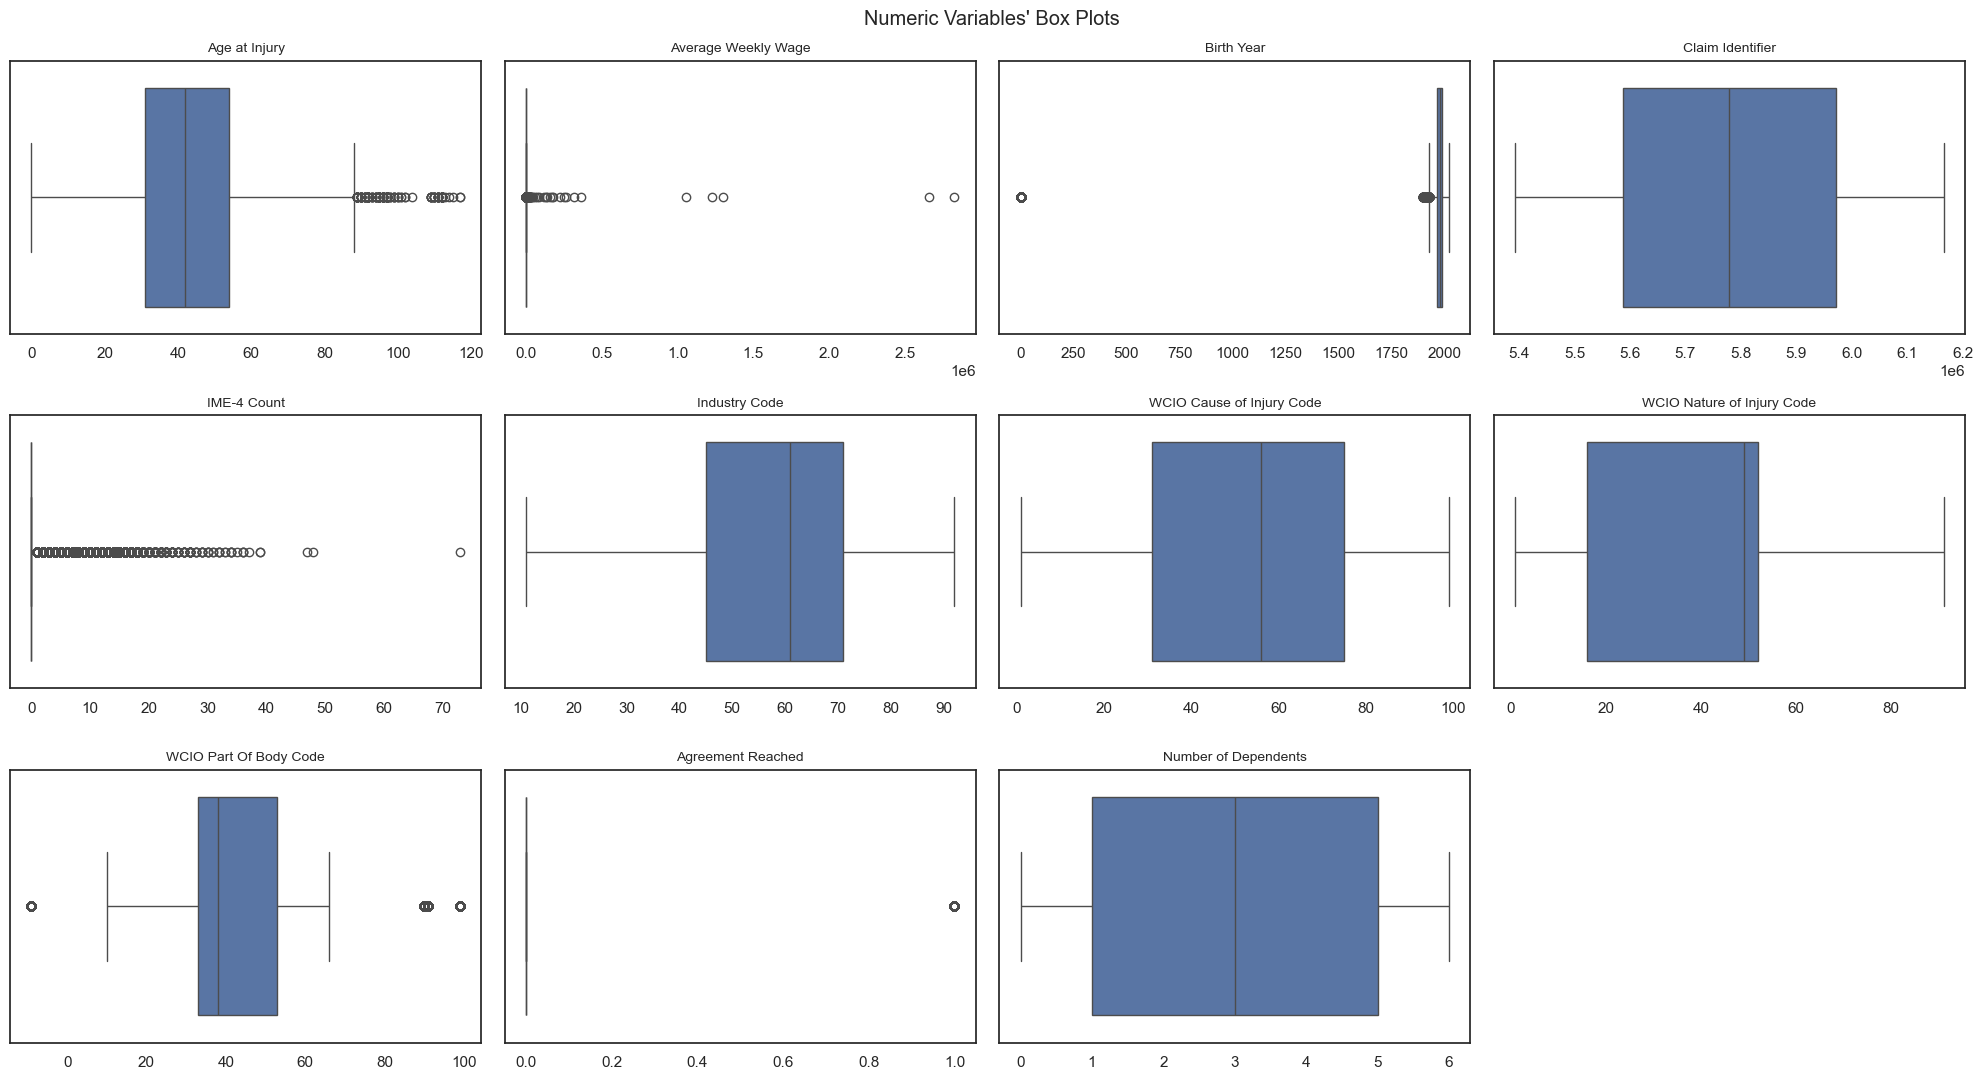

In [157]:
# Plot ALL Numeric Variables' Boxplots in one figure

sns.set_theme(style='white')

# Calculate the number of rows and columns for a square matrix layout
total_features = len(metric_features)
sp_cols = math.ceil(math.sqrt(total_features))  # Columns based on the square root of total features
sp_rows = math.ceil(total_features / sp_cols)   # Rows to accommodate all features

# Prepare figure. Create individual axes where each boxplot will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each boxplot. Hint: don't forget to attach the boxplot to the current ax
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_train[feat], ax=ax)
    ax.set_title(feat, fontsize=10)  # Set title
    ax.xaxis.set_label_position('top')  # Move the label to the top
    ax.set_xlabel('')  # Remove the default x-axis label at the bottom

# Remove empty subplots if there are more axes than features
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)
    
# Layout
title = "Numeric Variables' Box Plots"
plt.suptitle(title)

# Save the figure
# plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)

plt.show()

# Reset theme to "darkgrid"
sns.set()

Also here we can really calculate the interquantile range and blablabla and explore more the outliers

## 4.3. Categorical Features <a class="anchor" id="section_4_3"></a>
What should we do? encoding?

In [158]:
features_categorical = [
    'Alternative Dispute Resolution',
    'Attorney/Representative',
    'COVID-19 Indicator',
    'County of Injury',
    'Carrier Type',
    'District Name',
    'Gender',
    'Industry Code Description',
    'Medical Fee Region'
]

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [159]:
import re

# Remove non-alphabetic characters and convert to strings
for col in features_categorical:
    # Ensure all values are strings, remove non-alphabetic characters, and fill NaNs with 'missing'
    df_train[col] = df_train[col].astype(str).str.replace(r'[^a-zA-Z]', '', regex=True).fillna('missing')
# Double-check that all columns are now of type 'object' (string) or 'category'
print(df_train[features_categorical].dtypes)


KeyError: 'Industry Code Description'

Alternative Dispute Resolution
object


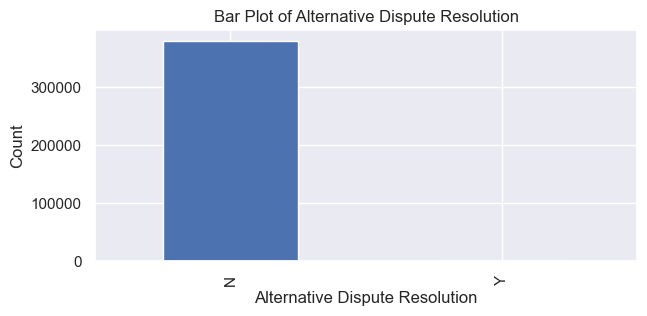

Attorney/Representative
object


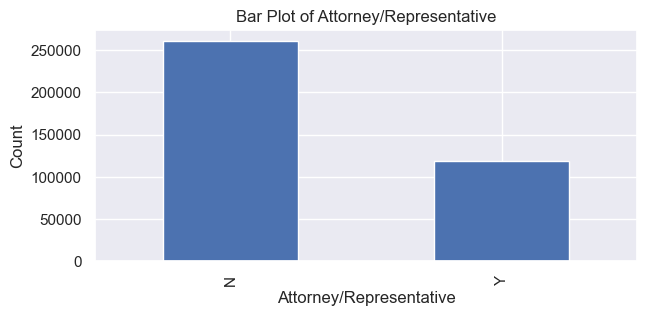

COVID-19 Indicator
object


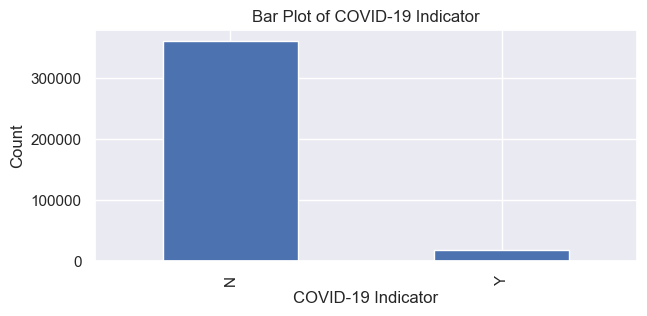

County of Injury
object


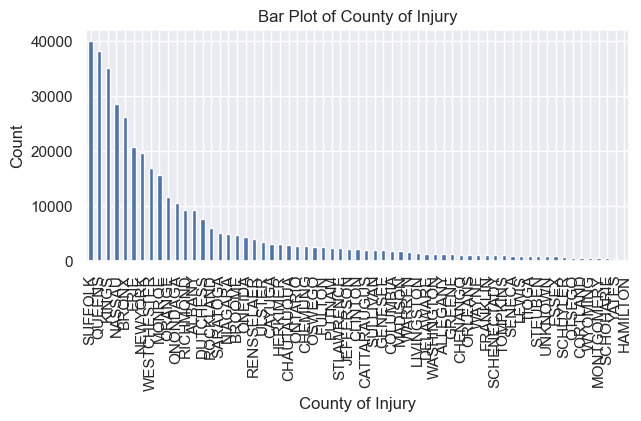

Carrier Type
object


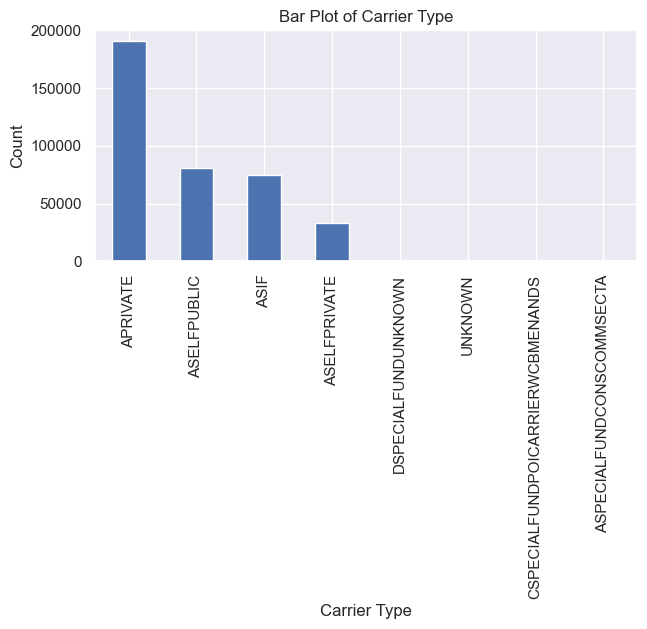

District Name
object


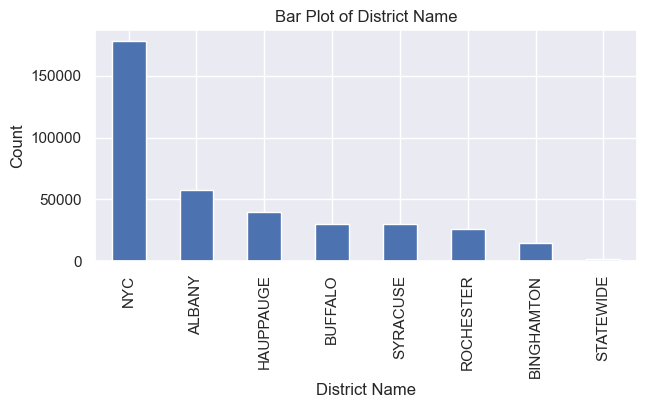

Gender
object


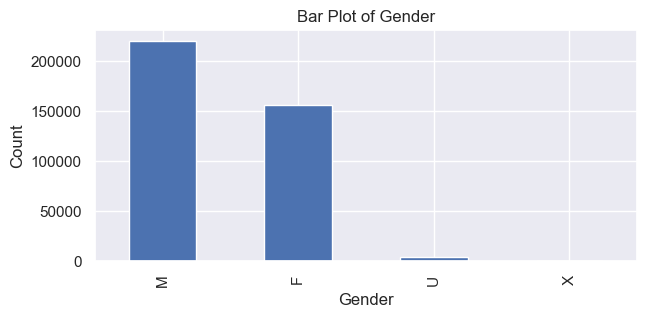

Industry Code Description
object


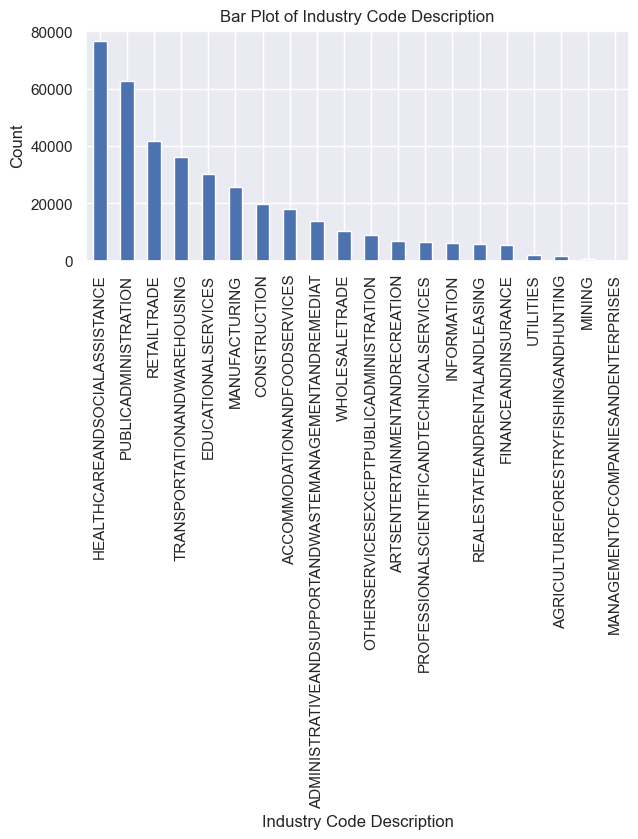

Medical Fee Region
object


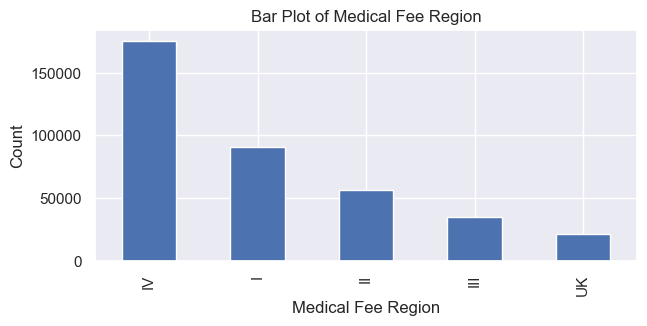

In [ ]:
for feature in features_categorical:
    print(feature)
    print(X_train[feature].dtype)
    X_train[feature].value_counts().plot(kind='bar', figsize=(7, 3))
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [ ]:
df_train.info()

In [ ]:
df_train['Industry Code Description'] = df_train['Industry Code Description'].astype('category')
df_train['Attorney/Representative'] = df_train['Attorney/Representative'].astype('category')


In [ ]:
df_train[features_categorical].dtypes

Alternative Dispute Resolution    category
Attorney/Representative           category
COVID-19 Indicator                category
County of Injury                  category
Carrier Type                      category
District Name                     category
Gender                            category
Industry Code Description         category
Medical Fee Region                category
dtype: object

# 5. Feature Engineering <a class="anchor" id="chapter5"></a>

here we should think about creating new features

# 6. Feature Selection <a class="anchor" id="chapter6"></a>
To start with the feature selection we first need to split our train dataset into X and y. And then split into train and validation.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

In [74]:
X= df_train.drop('Claim Injury Type',axis=1)
y=df_train['Claim Injury Type']

# Como o nosso target é o Claim Injury Type então vamos guardar em y e todas as outras colunas em x

In [75]:
df_train[df_train['Claim Injury Type'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,WCB Decision,Number of Dependents


In [78]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)

In [166]:
# FUNÇÃO DOS OUTLIERS (isto em princípio é util mas depois vemos isto)

def detect_outliers(df):
    outliers_indices = set()
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        outliers_indices.update(outlier_data.index)

        # Print the number of outliers
        print(f'Column: {column} - Number of Outliers: {len(outlier_data)}')
        print(f'Column: {column} - % of Outliers: {len(outlier_data) / len(df) * 100}% \n') 

    return outliers_indices          

In [141]:
iqr = detect_outliers(X_train)
iqr

Column: Age at Injury - Number of Outliers: 144
Column: Age at Injury - % of Outliers: 0.035837120288289726% 

Column: Average Weekly Wage - Number of Outliers: 16457
Column: Average Weekly Wage - % of Outliers: 4.095635337391555% 

Column: Birth Year - Number of Outliers: 17709
Column: Birth Year - % of Outliers: 4.407219188786963% 

Column: Claim Identifier - Number of Outliers: 0
Column: Claim Identifier - % of Outliers: 0.0% 

Column: IME-4 Count - Number of Outliers: 93056
Column: IME-4 Count - % of Outliers: 23.15874351074367% 

Column: Industry Code - Number of Outliers: 0
Column: Industry Code - % of Outliers: 0.0% 

Column: WCIO Cause of Injury Code - Number of Outliers: 0
Column: WCIO Cause of Injury Code - % of Outliers: 0.0% 

Column: WCIO Nature of Injury Code - Number of Outliers: 0
Column: WCIO Nature of Injury Code - % of Outliers: 0.0% 

Column: WCIO Part Of Body Code - Number of Outliers: 53852
Column: WCIO Part Of Body Code - % of Outliers: 13.402087512256793% 

Colu

{573135,
 524291,
 524293,
 524295,
 524298,
 11,
 262156,
 524301,
 524302,
 15,
 524306,
 524307,
 262164,
 524308,
 20,
 524311,
 262168,
 262169,
 524313,
 262171,
 29,
 262174,
 32,
 262176,
 524321,
 35,
 262181,
 39,
 262183,
 262185,
 524328,
 524332,
 262189,
 44,
 47,
 262192,
 262193,
 262190,
 524342,
 524343,
 56,
 55,
 262199,
 262203,
 524346,
 61,
 524344,
 262202,
 262208,
 524352,
 66,
 64,
 524353,
 262211,
 262212,
 524359,
 70,
 73,
 524362,
 262219,
 74,
 77,
 75,
 262223,
 524367,
 80,
 82,
 83,
 524372,
 84,
 262230,
 262224,
 88,
 262233,
 524379,
 93,
 94,
 95,
 524383,
 262241,
 98,
 524387,
 100,
 524382,
 262239,
 262247,
 524386,
 262249,
 105,
 524390,
 108,
 524397,
 262254,
 524398,
 524403,
 115,
 117,
 524405,
 262263,
 262261,
 524411,
 123,
 524412,
 128,
 524416,
 130,
 262276,
 524422,
 524423,
 524424,
 262283,
 262284,
 262288,
 524433,
 524434,
 262289,
 262293,
 262294,
 524440,
 262298,
 524443,
 524442,
 524445,
 262303,
 262305,
 262309,
 1

In [86]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_num.drop('Agreement Reached', axis = 1, inplace = True)

X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
X_train_cat['Agreement Reached'] = X_train['Agreement Reached']

X_val_num =  X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_num.drop('Agreement Reached', axis = 1, inplace = True)

X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)
X_val_cat['Agreement Reached'] = X_val['Agreement Reached']


#vamos retirar as colunas que são binárias

 ## 6.1. Scale the Data</b> <a class="anchor" id="section_6_1"></a>


In [87]:
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

In [173]:
#scaling features
# Usar robustscaler para dados que contêm outliers
# Usar minmaxscaler para dados que não têm outliers (conversa do chatgpt)
from sklearn.preprocessing import RobustScaler
feat_scaler = RobustScaler()
X_train_num = feat_scaler.fit_transform(X_train_num)

X_train_num_scaled = X_train_num

#apply same transformation for test data
X_val_num = feat_scaler.transform(X_val_num)

#X_val, X_train
X_train_num_scaled


array([[-0.04347826,  1.31155864,  0.08333333, ...,  0.        ,
         0.        ,  0.        ],
       [-0.82608696,  0.34438991,  0.875     , ...,  0.        ,
         0.85      ,  0.        ],
       [-0.73913043,  0.        ,  0.79166667, ...,  0.52777778,
        -0.15      ,  0.5       ],
       ...,
       [-0.43478261,  0.        ,  0.41666667, ..., -0.33333333,
         0.85      , -0.5       ],
       [ 0.17391304,  2.37150352, -0.16666667, ...,  0.27777778,
         1.4       ,  0.5       ],
       [-0.39130435,  1.52799604,  0.41666667, ...,  0.        ,
         0.2       ,  0.        ]])

In [160]:
# Como está nos notebooks do stor com o MinMax
# Em teoria não devemos fazer isto já porque ainda temos outliers o que torna este approach mau
#from sklearn.preprocessing import MinMaxScaler

#scaler_test = MinMaxScaler()
#scaler_test.fit(X_train[numerical_columns])
#X_train_num_scaled = scaler_test.transform(X_train[numerical_columns])

#X_train_num_scaled


In [172]:
# Ver Birth Year (valor estranho)
# Dropar os que têm 0, ver se podemos droppar o agreement reached por ser praticamente 0
X_train_num_scaled.var()

Age at Injury                   0.384478
Average Weekly Wage            43.098772
Birth Year                    283.712938
Claim Identifier                0.334062
IME-4 Count                     3.686378
Industry Code                   0.579162
WCIO Cause of Injury Code       0.345996
WCIO Nature of Injury Code      0.380249
WCIO Part Of Body Code          1.251635
Agreement Reached               0.044702
Number of Dependents            0.250391
dtype: float64

 ## 6.2. Numerical Features</b> <a class="anchor" id="section_6_2"></a>

 > ### Spearman and Pearson correlation matrix <a class="anchor" id="sub_section_4_1_2"></a>

In [146]:
def cor_heatmap(cor, name):
    plt.figure(figsize=(18,12))
    sns.heatmap(data = cor.round(2), annot = True, cmap = 'viridis', linecolor = 'white', linewidth=0.5, fmt='.2', mask=np.triu(cor, k=0))
    plt.title(f'{name} Correlation Matrix', fontdict = {'fontsize': 20})
    plt.show()

In [173]:
#we have to create features_continuous
# Temos de fazer isto (não sabemos fazer a malta que esteve cá na segunda)

In [175]:
X_train.dtypes
#df_train[features_categorical].dtypes

Accident Date                     datetime64[ns]
Age at Injury                            float64
Alternative Dispute Resolution            object
Assembly Date                     datetime64[ns]
Attorney/Representative                   object
Average Weekly Wage                      float64
Birth Year                               float64
C-2 Date                          datetime64[ns]
Carrier Name                            category
Carrier Type                              object
Claim Identifier                         float64
County of Injury                          object
COVID-19 Indicator                        object
District Name                             object
First Hearing Date                datetime64[ns]
Gender                                    object
IME-4 Count                              float64
Industry Code                            float64
Medical Fee Region                      category
WCIO Cause of Injury Code                float64
WCIO Nature of Injur

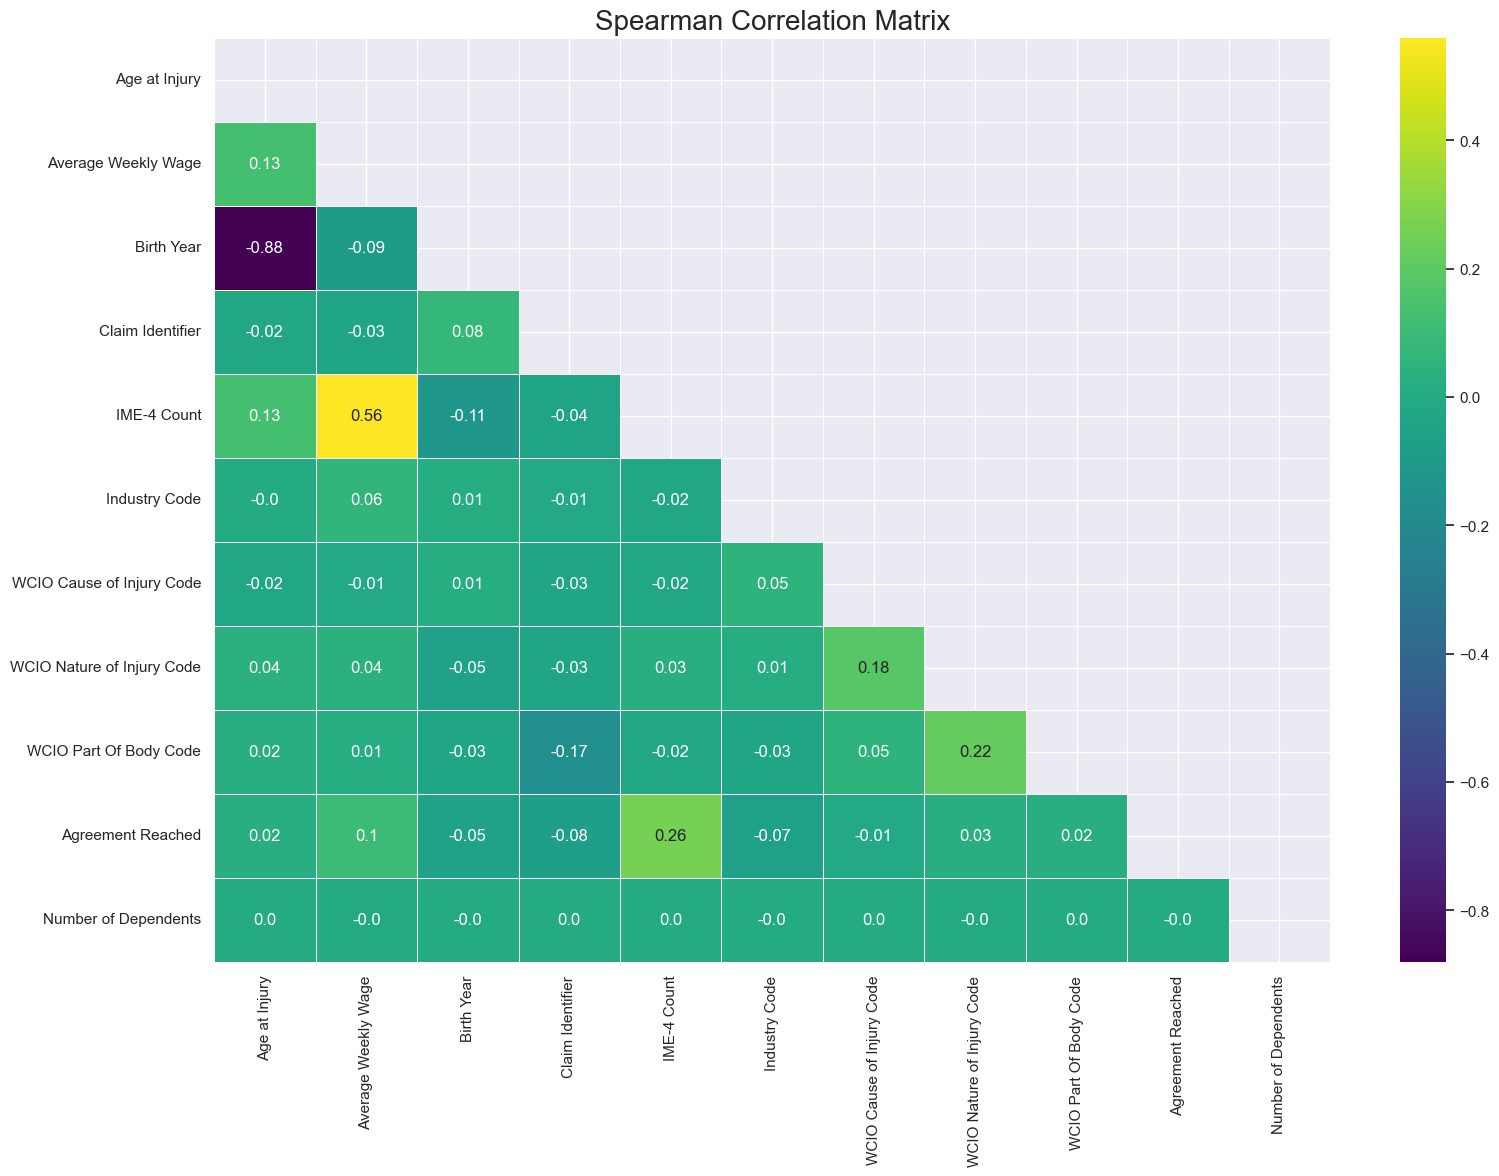

In [174]:
corr_data_numerical = df_train[numerical_columns]
# corr_data_continuous = df_train[features_continuous]
cor_spearman = corr_data_numerical.corr(method='spearman')
# cor_pearson = corr_data_continuous.corr(method='pearson')

cor_heatmap(cor_spearman, 'Spearman')
# cor_heatmap(cor_pearson, 'Pearson')

 > ### LASSO Regression <a class="anchor" id="sub_section_4_1_3"></a>

In [ ]:
#fit regression
reg = LassoCV().fit(X_train[features_continuous], y_train)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train[features_continuous].columns)
#obtain coef values
coef.sort_values()

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(3,5))
    imp_coef.plot(kind = "barh", color='c')
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
plot_importance(coef,'Lasso')

 > ### Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_1_4"></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [ ]:
# Number of features
nof_list=np.arange(1,27)            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train[numerical_columns],y_train)
    X_val_rfe = rfe.transform(X_val[numerical_columns])
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#rfscv- to select 1st the number of features we should select
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 9)

In [ ]:
X_rfe= rfe.fit_transform(X=X_train[numerical_columns], y=y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
selected_features = pd.Series(rfe.support_, index = X_train[numerical_columns].columns)
selected_features

Age at Injury                  True
Average Weekly Wage            True
Birth Year                     True
Claim Identifier               True
Industry Code                  True
WCIO Cause of Injury Code      True
WCIO Nature of Injury Code     True
WCIO Part Of Body Code         True
Agreement Reached              True
Number of Dependents          False
dtype: bool

 ## 6.3. Categorical Features</b> <a class="anchor" id="section_6_3"></a>
Chi-squared and MIC for the categorical ones.

In [ ]:
X_train.head(4).T


,214651,227461,174160,181816
Accident Date,2021-03-01 00:00:00,2021-03-13 00:00:00,2020-12-06 00:00:00,2020-12-16 00:00:00
Age at Injury,-0.217391,-0.26087,0.434783,0.608696
Alternative Dispute Resolution,N,N,N,N
Assembly Date,2021-03-03 00:00:00,2021-03-26 00:00:00,2020-12-17 00:00:00,2021-01-05 00:00:00
Attorney/Representative,N,N,Y,Y
Average Weekly Wage,0.0,0.0,0.0,0.781088
Birth Year,0.25,0.291667,-0.375,-82.375
C-2 Date,2021-03-03 00:00:00,2021-03-26 00:00:00,2021-10-13 00:00:00,2020-12-28 00:00:00
Carrier Name,BEACON CITY SCHOOL DISTRICT,STATE INSURANCE FUND,"CNY OTHER THAN ED, HED WATER",CONTINENTAL INDEMNITY COMPANY
Carrier Type,ASELFPUBLIC,ASIF,ASELFPUBLIC,APRIVATE


 > ### $\chi ^2$ Test for Independence <a class="anchor" id="sub_section_4_2_1"></a>

In [ ]:
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in features_categorical:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_val[col] = label_encoder.transform(X_val[col])


In [ ]:
#Chi-square test
threshold = 5 #we want to only keep the 4 most relevant features
high_score_features_chi2 = []
scores = []
names_Chi2 = []

feature_scores = SelectKBest(chi2, k=threshold).fit(X_train[features_categorical],y_train).scores_

high_score_features = []
for score, f_name in sorted(zip(feature_scores,X_train[features_categorical].columns), reverse=True)[:threshold]:
        high_score_features_chi2.append(f_name)
        scores.append(score)
        names_Chi2.append(f_name)

> ### Mutual Information Criterion <a class="anchor" id="sub_section_4_2_2"></a>

In [ ]:
 #MIC 
threshold = 5 #we want to only keep the 4 most relevant features
high_score_features_MIC = []
scores = []
names_MIC = []
feature_scores = mutual_info_classif(X_train[features_categorical],y_train, random_state=0)
for score, f_name in sorted(zip(feature_scores, X_train[features_categorical].columns), reverse=True)[:threshold]:
        high_score_features_MIC.append(f_name)
        scores.append(score)
        names_MIC.append(f_name)

In [ ]:
common_categorical_features = list(set(names_Chi2).intersection(list(names_MIC)))
features_selected = common_categorical_features

In [ ]:
features_selected

['Industry Code Description',
 'Attorney/Representative',
 'Carrier Type',
 'Medical Fee Region']

 ## 6.4. Final Features</b> <a class="anchor" id="section_6_4"></a>
Make that beautiful table, where we say in which case we reject each variable and then the final decision

# 7. Modeling <a class="anchor" id="chapter7"></a>
